In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("delhi_weather.csv")


df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')


df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['tempmax'] = pd.to_numeric(df['tempmax'], errors='coerce')
df['tempmin'] = pd.to_numeric(df['tempmin'], errors='coerce')


df = df.dropna(subset=['DATE','temp'])


df = df.sort_values('DATE')
df = df.set_index('DATE')


In [3]:
df.dtypes
type(df.index)


pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
monthly = df['temp'].resample('ME').mean()


In [8]:
monthly_df = monthly.to_frame(name='temp')
monthly_df = monthly_df.dropna()


monthly_df['time'] = (monthly_df.index - monthly_df.index.min()).days / 365.25

In [9]:
from sklearn.linear_model import LinearRegression

X = monthly_df[['time']]
y = monthly_df['temp']

model2 = LinearRegression()
model2.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
warming_per_year = model2.coef_[0]
warming_per_year


np.float64(0.004747650195115228)

In [11]:
warming_per_decade = warming_per_year * 10
warming_per_decade


np.float64(0.04747650195115228)

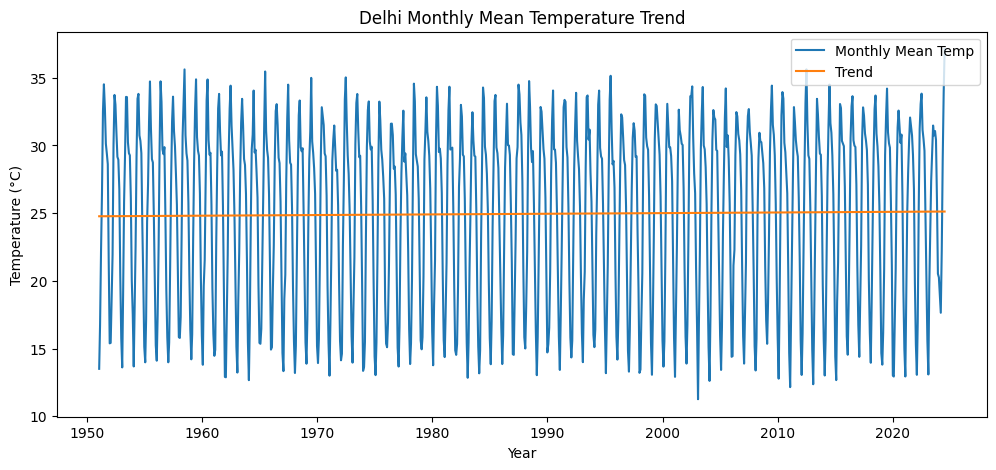

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_df.index, monthly_df['temp'], label="Monthly Mean Temp")
plt.plot(monthly_df.index, model2.predict(monthly_df[['time']]), label="Trend")
plt.legend()
plt.title("Delhi Monthly Mean Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()
